In [1]:
import gensim.downloader
model = gensim.downloader.load("glove-wiki-gigaword-50")

[==================================================] 100.0% 66.0/66.0MB downloaded


In [2]:
model["tower"]

array([ 1.1474e+00,  1.1811e+00,  7.4556e-01, -5.9101e-02,  5.0499e-01,
       -7.0449e-01, -3.2136e-01, -4.5390e-01, -4.5763e-01, -7.5341e-01,
       -3.3511e-01, -2.4975e-02, -5.0192e-01,  6.3773e-01, -8.3059e-01,
        8.3565e-01, -2.4701e-01,  3.2421e-01, -1.1103e+00, -2.1335e-02,
        6.8717e-01, -3.9340e-01, -1.6390e+00, -5.0493e-01, -1.6684e-01,
       -6.7649e-01, -3.1798e-01,  8.8503e-01, -3.1552e-02, -1.5608e-01,
        1.9805e+00, -1.1870e+00,  8.3342e-01, -1.8369e-01, -2.6691e-01,
        1.1619e-01,  1.1023e+00, -3.5937e-01,  2.5015e-02, -4.0615e-02,
        3.0681e-01, -4.1076e-01,  8.4586e-02,  2.2475e-01, -5.0955e-01,
        6.5819e-01, -1.2432e-01, -1.4039e+00,  1.6178e-04, -5.2529e-01],
      dtype=float32)

In [3]:
words = ["tower", "building", "skyscraper", "roof", "dome", "lighthouse", "constructed", "facade"]
vectors = [model[word] for word in words]

In [4]:
from sklearn.decomposition import PCA
import numpy as np

pca = PCA(n_components=3)
reduced_vectors = pca.fit_transform(vectors)

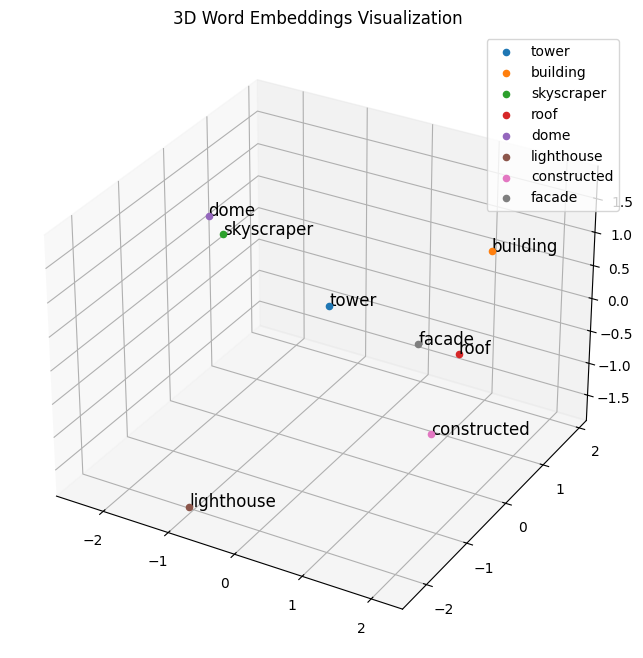

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for i, word in enumerate(words):
    x, y, z = reduced_vectors[i]
    ax.scatter(x, y, z, label=word)
    ax.text(x, y, z, word, fontsize=12)

ax.set_title("3D Word Embeddings Visualization")
plt.legend()
plt.show()

In [10]:
import gensim.downloader as api

# Load model
model = api.load("glove-wiki-gigaword-50")

# Get the vectors
v_queen = model["queen"]
v_king = model["king"]
v_woman = model["woman"]
v_man = model["man"]

# Compute difference vectors
diff_royalty = v_queen - v_king
diff_gender = v_woman - v_man

# Compute cosine similarity between the two difference vectors
cos_sim = np.dot(diff_royalty, diff_gender) / (np.linalg.norm(diff_royalty) * np.linalg.norm(diff_gender))

print("Cosine similarity between E(queen)-E(king) and E(woman)-E(man):", cos_sim)

Cosine similarity between E(queen)-E(king) and E(woman)-E(man): 0.5970326
